In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img1=io.imread('./Notebook/size_1.jpg')
img2=io.imread('./Notebook/size_2.jpg')
# img3=io.imread('./Notebook/size_3.jpg')

# plt.imshow(img2)

In [3]:
import torch
import torchvision.transforms as T
print(img1.shape)
trsfm=T.ToTensor()

# batch img transform
x=torch.from_numpy(np.array([img1,img2]))
x=x.permute(0,3,1,2)
print(x.shape)

# single img transform
# x=trsfm(img1).unsqueeze(0)
# print(x.shape)
# plt.imshow(img1)

(512, 512, 3)
torch.Size([2, 3, 512, 512])


In [4]:
dtype=torch.float
USE_GPU=True

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

device=torch.device('cuda')
print(device)

cuda


In [5]:
from model.faster_rcnn import FasterRCNN as FRCNN

fNet=FRCNN(n_class=10)
x=x.to(dtype=dtype,device=device)
fNet.cuda(device=device)

bboxes, labels, scores=fNet.predict(x)
# # print(fNet)
# # y=fNet.featureNet(x)
# # score, loc, rois,roi_indices, anchor=fNet.rpn(y, [512,512])
# # a=fNet.head.RoIPool(featureMap, rois , roi_indices)
# print(l.shape,s.shape)

In [6]:
from model.utils.vgg_decompose import FeatureNet as features
x=x.to(dtype=dtype,device=device)
features.cuda(device=device)
featureMap=features(x)
featureMap.shape

torch.Size([2, 512, 32, 32])

In [7]:
# import torch.nn as nn
# output=[]
# t=featureMap[0]
# g=nn.AdaptiveMaxPool2d((7,7))
# m=g(t[:,1:25,2:10])
# output.append(m)

# # t=featureMap[1]
# # g=nn.AdaptiveMaxPool2d((7,7))
# # m=g(t[:,5:25,1:10])
# # output.append(m)

# e=torch.stack(output, dim=0)
# print(e.shape)

In [8]:
from model.utils.vgg_decompose import ClassifierNet as classifier

classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Linear(in_features=4096, out_features=4096, bias=True)
  (3): ReLU(inplace)
)

In [9]:
from model.utils.rpn import RPN
rNet=RPN()
rNet.cuda()
# rNet.eval()

RPN(
  (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (score): Conv2d(512, 18, kernel_size=(1, 1), stride=(1, 1))
  (loc): Conv2d(512, 36, kernel_size=(1, 1), stride=(1, 1))
)

In [10]:
img_size=img1.shape
print(img_size)
score, loc, rois,roi_indices, anchor=rNet(featureMap, img_size)

(512, 512, 3)


In [11]:
print(roi_indices.shape)

(2000,)


In [12]:
from model.utils.vgg_roi_head import VGG_RoI_Head
vNet=VGG_RoI_Head(10)
vNet.cuda()
final_loc, final_score = vNet(featureMap, rois, roi_indices)
print(final_loc.shape)

torch.Size([2000, 40])


In [13]:
from model.utils.final_suppression import suppression

bboxes, labels, scores=suppression(rois,roi_indices,final_loc, final_score, 10, img_size, img_number=2, high_thresh=True)

In [14]:
# import fina
print(bboxes[1].shape)

(90, 4)


In [15]:
print(bboxes[0].shape)

(111, 4)


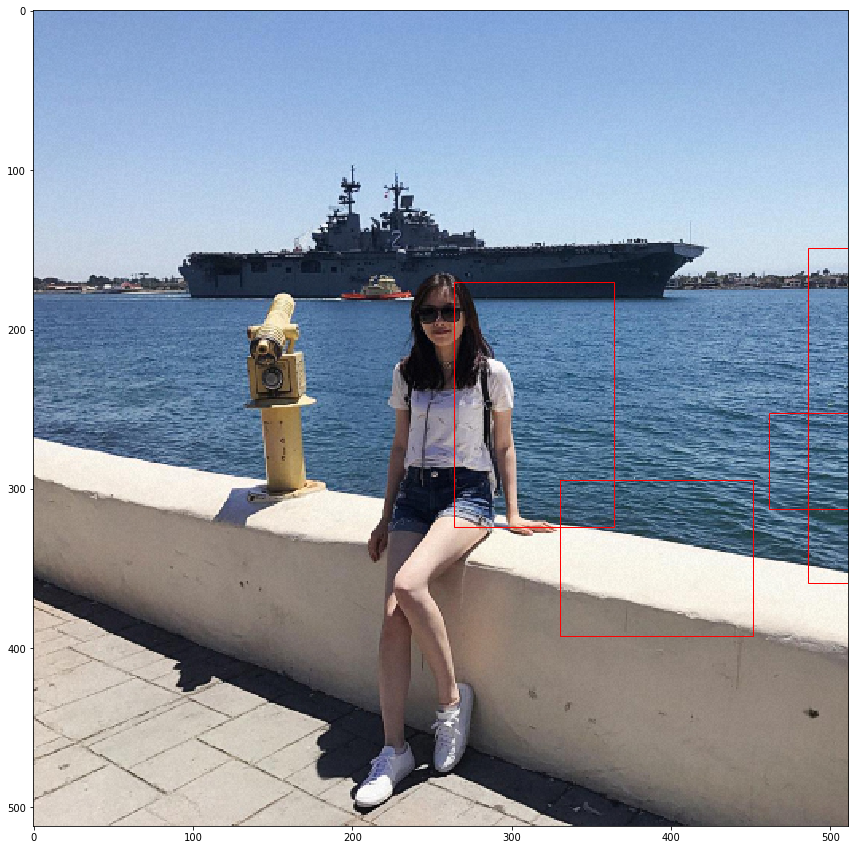

(111, 4)


In [16]:
import matplotlib.patches as patches

fig,ax = plt.subplots(1,figsize=(15,15))

# Display the image
ax.imshow(img2)
n=50
bbox=bboxes[0]
for i in range(n,n+5):
    xy=bbox[i][0:2]
    w=bbox[i][2]-bbox[i][0]
    h=bbox[i][3]-bbox[i][1]
    # Create a Rectangle patch
    rect = patches.Rectangle(xy,w,h,linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()
print(bboxes[0].shape)

In [ ]:
# type(rois)
# rois=torch.from_numpy(rois)
# rois.reshape(-1,1,4).shape
# loc.cpu().data.numpy()
# type(rois)

In [ ]:
from model.faster_rcnn import FasterRCNN as FRCNN

fNet=FRCNN()
x=x.to(dtype=dtype,device=device)
# fNet.cuda(device=device)

# l,s=fNet(x)
# print(fNet)
# y=fNet.featureNet(x)
# score, loc, rois,roi_indices, anchor=fNet.rpn(y, [512,512])
# a=fNet.head.RoIPool(featureMap, rois , roi_indices)

In [ ]:
from model.utils.roi_pooling import RoIPool
roiPool=RoIPool()
output=roiPool(featureMap,rois, roi_indices)

# from model.utils.vgg_decompose import classifier

# print(output.shape)
# classifier.cuda()
# output.to(device=device)
# output=output.view(output.size(0),-1)
# out=classifier(output)

# print(out.shape)

# from model.utils.vgg_roi_head import VGG_RoI_Head
# RoIHead=VGG_RoI_Head(n_class=10)
# RoIHead.cuda()
# output.to(device=device)
# final_loc, final_score= RoIHead(featureMap, rois, roi_indices)

In [ ]:
print(final_loc.shape)
print(final_score[0])

In [ ]:
print(output.shape)

In [ ]:
import matplotlib.patches as patches

fig,ax = plt.subplots(1,figsize=(15,15))


# Display the image
ax.imshow(img1)

# rois=anchor
print(rois.shape)
n=100
for i in range(n,n+3):
    xy=rois[i][0:2]
    w=rois[i][2]-rois[i][0]
    h=rois[i][3]-rois[i][1]
    # Create a Rectangle patch
    rect = patches.Rectangle(xy,w,h,linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()




In [94]:
max(rois[0][1][:])

NameError: name 'rois' is not defined

In [118]:
from model.utils.bbox_iou import bbox_iou
import numpy as np
bbox=np.random.randint(0,1000,size=[100,4])
roi=np.random.randint(0,1000,size=[15,4])
iou=bbox_iou(roi,bbox)
label=np.random.randint(0,1000,size=[100,1])
print(iou)

[[ 0.         -0.         -0.         ... -0.          0.
  -0.        ]
 [ 0.          0.         -0.         ... -0.          0.
  -0.        ]
 [-0.         -0.         -0.         ... -0.          0.
  -0.        ]
 ...
 [ 0.06227466  0.          0.         ... -0.          0.
   0.        ]
 [ 0.          0.         -0.         ... -0.          0.
  -0.        ]
 [ 0.          0.         -0.         ... -0.          0.
  -0.        ]]


In [119]:
iou.shape

(15, 100)

In [120]:
order=iou.argmax(axis=1)

In [121]:
order.shape
order
# iou[:,10].shape

array([ 0, 93,  0,  0,  0, 80, 78, 36,  0,  0,  5, 16, 38, 76,  0],
      dtype=int64)

In [124]:
print(label.shape)
label[order]

(100, 1)


array([[350],
       [880],
       [350],
       [350],
       [350],
       [856],
       [266],
       [846],
       [350],
       [350],
       [763],
       [  1],
       [500],
       [524],
       [350]])

In [126]:
label.shape

(100, 1)